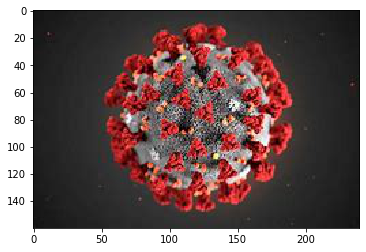

In [43]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(r'C:\Users\moumi\Desktop\Project python\OIP.jpg')
plt.imshow(img)
plt.show()

In [28]:
#importing the data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

#key values for the coulumns
cols = confirmed_df.keys()

#isolating the columns
cf=confirmed_df[['Country/Region','Lat','Long']]

#isolating the dates column
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

#inserted a new column to remove the cumulative effect, then dropped the same column and renamed the coulmns after melting.
confirmed.insert(0,'name_of_column',0)
difference= confirmed.diff(axis=1);
difference.drop('name_of_column',axis=1,inplace=True)
covid_23=difference.join(cf[['Country/Region','Lat','Long']])
confirm=covid_23.melt(id_vars=['Country/Region','Lat','Long'])
confirm.rename(columns={'variable':'date','value':'confirmed'},inplace=True)
rf=recoveries_df[['Country/Region','Lat','Long']]
recoveries.insert(0,'name_of_column',0)
differencer= recoveries.diff(axis=1);
differencer.drop('name_of_column',axis=1,inplace=True)
covid_r=differencer.join(rf[['Country/Region','Lat','Long']])
confirmr=covid_r.melt(id_vars=['Country/Region','Lat','Long'])
confirmr.rename(columns={'variable':'date','value':'recovered'},inplace=True)
df=deaths_df[['Country/Region','Lat','Long']]
deaths.insert(0,'name_of_column',0)
differenced=deaths.diff(axis=1);
differenced.drop('name_of_column',axis=1,inplace=True)
covid_d=differenced.join(df[['Country/Region','Lat','Long']])
confirmd=covid_d.melt(id_vars=['Country/Region','Lat','Long'])
confirmd.rename(columns={'variable':'date','value':'death'},inplace=True)

#merged the coulmns to create a single dataset with confirmed, recovered and death values, also removed null values.
covid_21=pd.merge(confirm,confirmd,how='outer')
covid_20=pd.merge(covid_21,confirmr,how='outer')
covid_20['confirmed'] =covid_20['confirmed'].fillna(value=0)
covid_20['death'] =covid_20['death'].fillna(value=0)
covid_20['recovered'] =covid_20['recovered'].fillna(value=0)

#file exported in excel formal
covid_20.to_excel("COVID_20.xlsx",
             sheet_name='Covid20',index=False)
covid_20

,Country/Region,Lat,Long,date,confirmed,death,recovered
0,Afghanistan,33.0000,65.0000,1/22/20,0.0,0.0,0.0
1,Albania,41.1533,20.1683,1/22/20,0.0,0.0,0.0
2,Algeria,28.0339,1.6596,1/22/20,0.0,0.0,0.0
3,Andorra,42.5063,1.5218,1/22/20,0.0,0.0,0.0
4,Angola,-11.2027,17.8739,1/22/20,0.0,0.0,0.0
...,...,...,...,...,...,...,...
23215,Timor-Leste,-8.8742,125.7275,4/15/20,0.0,0.0,0.0
23216,Canada,56.1304,-106.3468,4/16/20,0.0,0.0,732.0
23217,Mozambique,-18.6657,35.5296,4/16/20,0.0,0.0,0.0
23218,Syria,34.8021,38.9968,4/16/20,0.0,0.0,0.0


In [11]:
#total cases per countried with different ratios
covid_19=covid_20.groupby('Country/Region')['Country/Region','confirmed','recovered','death'].sum()
covid_19['Active']=covid_19['confirmed']-covid_19['death']-covid_19['recovered']
covid_19['Fatality']=covid_19['death']/covid_19['confirmed']*100
covid_19['Mortality']=covid_19['recovered']/covid_19['confirmed']*100
covid_19['CnfRatio-world']=(covid_19.groupby('Country/Region')['confirmed'].sum()/covid_19['confirmed'].sum())*100
covid_19['RecRatio-world']=(covid_19.groupby('Country/Region')['recovered'].sum()/covid_19['recovered'].sum())*100
covid_19['deaRatio-world']=(covid_19.groupby('Country/Region')['death'].sum()/covid_19['death'].sum())*100
covid_19['ActRatio-world']=(covid_19.groupby('Country/Region')['Active'].sum()/covid_19['Active'].sum())*100
covid_19.reset_index(inplace=True)

#file exprted to excel format
covid_19.to_excel("COVID_19.xlsx",
             sheet_name='Covid19',index=False)
covid_19

,Country/Region,confirmed,recovered,death,Active,Fatality,Mortality,CnfRatio-world,RecRatio-world,deaRatio-world,ActRatio-world
0,Afghanistan,840.0,54.0,30.0,756.0,3.571429,6.428571,0.039022,0.009961,0.020862,0.051543
1,Albania,518.0,277.0,26.0,215.0,5.019305,53.474903,0.024063,0.051097,0.018081,0.014658
2,Algeria,2268.0,783.0,348.0,1137.0,15.343915,34.523810,0.105359,0.144436,0.242004,0.077519
3,Andorra,673.0,169.0,33.0,471.0,4.903418,25.111441,0.031264,0.031175,0.022949,0.032112
4,Angola,19.0,5.0,2.0,12.0,10.526316,26.315789,0.000883,0.000922,0.001391,0.000818
...,...,...,...,...,...,...,...,...,...,...,...
180,West Bank and Gaza,374.0,63.0,2.0,309.0,0.534759,16.844920,0.017374,0.011621,0.001391,0.021067
181,Western Sahara,6.0,0.0,0.0,6.0,0.000000,0.000000,0.000279,0.000000,0.000000,0.000409
182,Yemen,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000046,0.000000,0.000000,0.000068
183,Zambia,48.0,30.0,2.0,16.0,4.166667,62.500000,0.002230,0.005534,0.001391,0.001091
